In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
def usecols(num_sensor):
    return [i for i in range(1, num_sensor+2)]

def rmse(series):
    rm = np.mean(series**2)
    return np.sqrt(rm)

def rmse_minus(series):  
    mask = series > np.mean(series)
    rm = np.mean(series[mask] ** 2)
    return np.sqrt(rm)

def rmse_minus_(series):
    a = np.mean(series)
    mask = series > a
    rm_ = np.mean((series[mask] - a)**2)
    return np.sqrt(rm_)

def get_fft_freq(series):
    pass

def get_lower_point(series):
    pass

def get_amplitute(series):
    pass

def df_index():
    index_name = []
    for i in range(10):
        for v in ['high', 'median', 'low']:
            index_name.append(f'Resist{10-i}_{v}')
    return index_name



def cal_rpm(series):
    def cal_fft(series):
        N = len(series)
        period = series.index[-1]
        fft_list = np.fft.fft(series)[:N//2]
        fft_abs = abs(fft_list)
        fs = N / period
        fk = np.arange(N) / period
        return fft_list, fft_abs, fk, fs
    
    fft_list, fft_abs, fk, fs = cal_fft(series)
    fft_freq = fk[fft_abs[1:].argmax()]
    
    return fft_freq

In [56]:
num_sensors = 12
col_list = usecols(num_sensors)
index_name = df_index()

## average

In [57]:
avg_info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    avg_info.append(data.apply(np.mean))
avg_info = pd.DataFrame(avg_info, index=index_name)
avg_info.head(1)

,volt_0,volt_1,volt_2,volt_3,volt_4,volt_5,volt_6,volt_7,volt_8,volt_9,volt_10,volt_11
Resist10_high,0.327187,0.440811,0.410832,0.287014,0.355455,0.493586,0.266369,0.557797,0.489194,0.420517,0.588504,0.460929


(-1, 30)

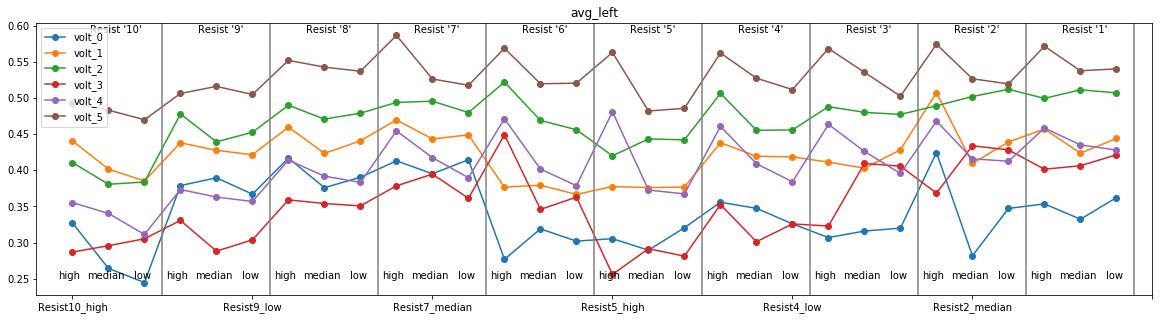

In [6]:
ax = avg_info.loc[:, 'volt_0':'volt_5'].plot(marker='o', figsize=(20,5), title='avg_left')
for i in range(10):
    ax.axvline(x=2.5+i*3, color='grey')
    ax.text(0.5+3*i, 0.59, f"Resist '{10-i}'")
    ax.text(-0.4+3*i, 0.25, f"high")
    ax.text(0.4+3*i, 0.25, f"median")
    ax.text(1.7+3*i, 0.25, f"low")
ax.set_xlim(-1,30)

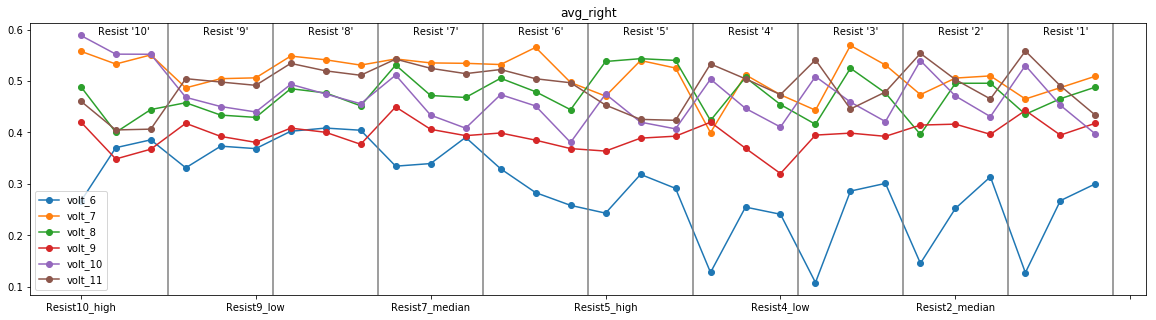

In [7]:
ax = avg_info.loc[:, 'volt_6':'volt_11'].plot(marker='o', figsize=(20,5), title='avg_right')
for i in range(10):
    ax.axvline(x=2.5+i*3, color='grey')
    ax.text(0.5+3*i, 0.59, f"Resist '{10-i}'")

## rmse

In [8]:
col_list = usecols(12)
rmse_info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    rmse_info.append(data.apply(rmse))
rmse_info = pd.DataFrame(rmse_info, index=index_name)

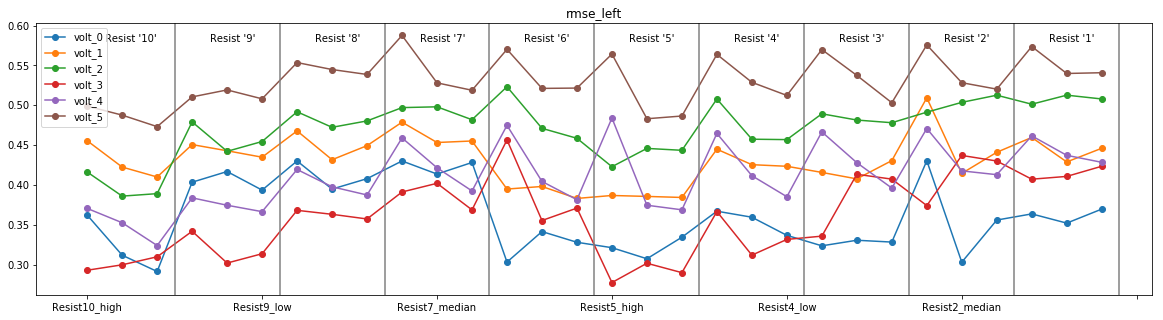

In [9]:
ax = rmse_info.loc[:, 'volt_0':'volt_5'].plot(marker='o', figsize=(20,5), title='rmse_left')
for i in range(10):
    ax.axvline(x=2.5+i*3, color='grey')
    ax.text(0.5+3*i, 0.58, f"Resist '{10-i}'")

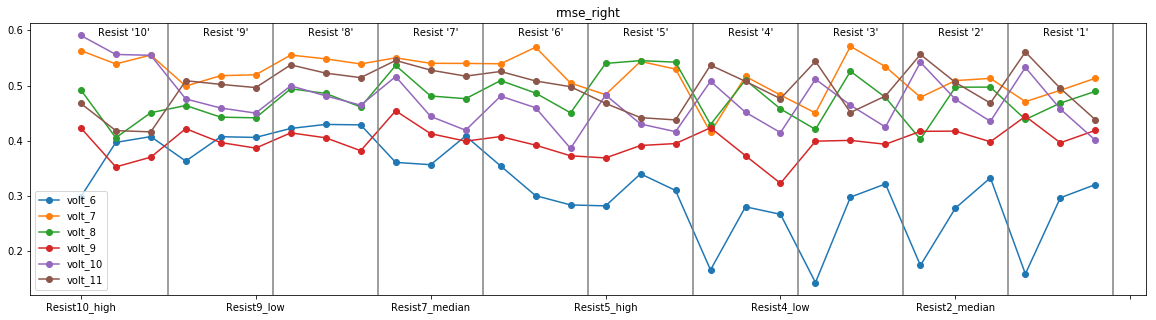

In [10]:
ax = rmse_info.loc[:, 'volt_6':'volt_11'].plot(marker='o', figsize=(20,5), title='rmse_right')
for i in range(10):
    ax.axvline(x=2.5+i*3, color='grey')
    ax.text(0.5+3*i, 0.59, f"Resist '{10-i}'")

## rmse_minus

In [60]:
col_list = usecols(12)
rmse_minus_info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    rmse_minus_info.append(data.apply(rmse_minus))
rmse_minus_info = pd.DataFrame(rmse_minus_info, index=index_name)
rmse_minus_info.head(1)

,volt_0,volt_1,volt_2,volt_3,volt_4,volt_5,volt_6,volt_7,volt_8,volt_9,volt_10,volt_11
Resist10_high,0.466435,0.534813,0.464703,0.338955,0.457216,0.56565,0.410781,0.625809,0.533087,0.455722,0.632856,0.530531


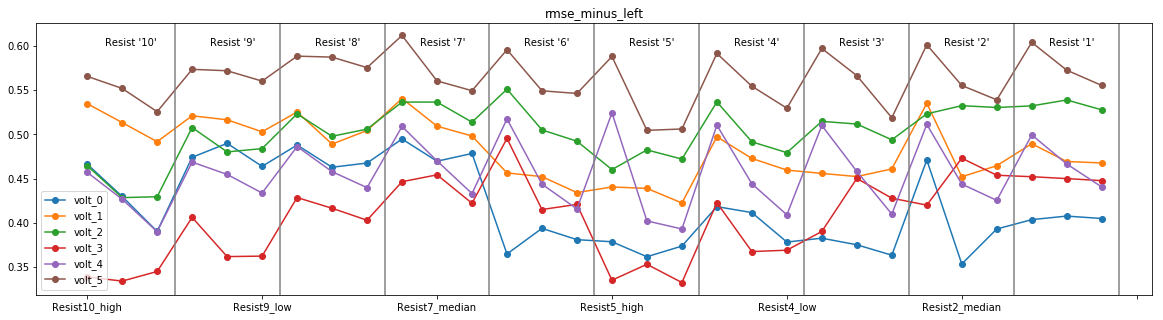

In [61]:
ax = rmse_minus_info.loc[:, 'volt_0':'volt_5'].plot(marker='o', figsize=(20,5), title='rmse_minus_left')
for i in range(10):
    ax.axvline(x=2.5+i*3, color='grey')
    ax.text(0.5+3*i, 0.6, f"Resist '{10-i}'")

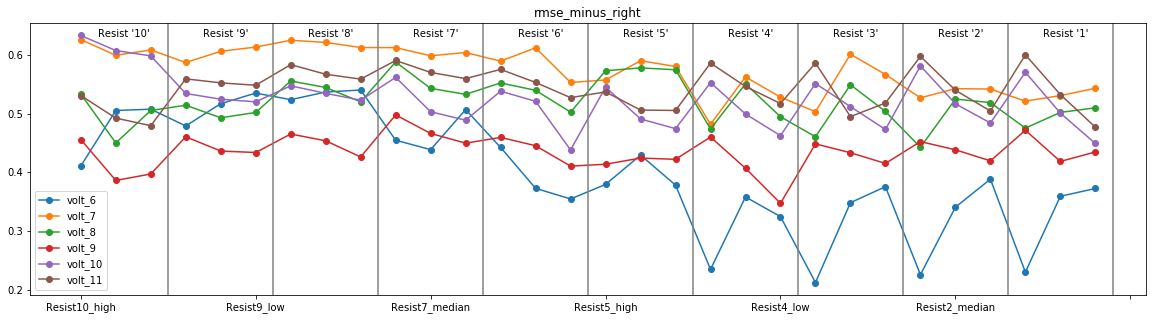

In [62]:
ax = rmse_minus_info.loc[:, 'volt_6':'volt_11'].plot(marker='o', figsize=(20,5), title='rmse_minus_right')
for i in range(10):
    ax.axvline(x=2.5+i*3, color='grey')
    ax.text(0.5+3*i, 0.63, f"Resist '{10-i}'")

## 2P

In [63]:
info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'    
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    fore_left = data[['volt_0', 'volt_1', 'volt_2']].mean(axis=1)
    heel_left = data[['volt_4', 'volt_5']].mean(axis=1)
    fore_right = data[['volt_6', 'volt_7', 'volt_8']].mean(axis=1)
    heel_right = data[['volt_10', 'volt_11']].mean(axis=1)
    info.append((fore_left.mean(), heel_left.mean(), fore_right.mean(), heel_right.mean()))
avg_2P_info = pd.DataFrame(info, index=index_name, columns=['fore_left', 'heel_left', 'fore_right', 'heel_right'])
avg_2P_info.head(1)

,fore_left,heel_left,fore_right,heel_right
Resist10_high,0.392943,0.42452,0.437787,0.524716


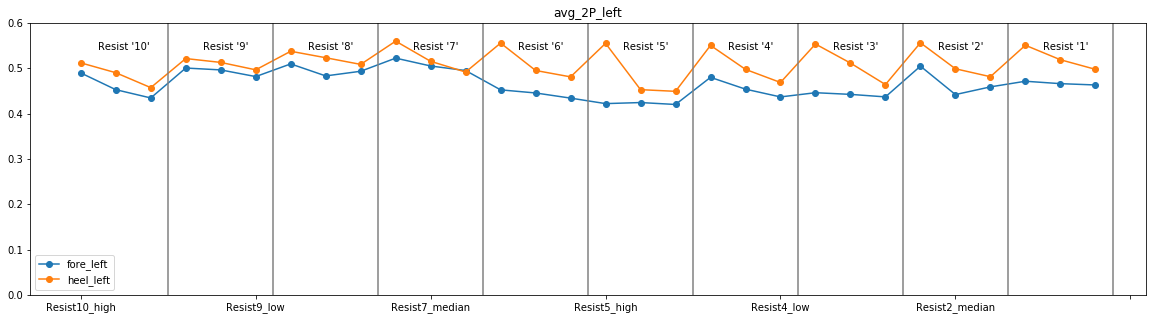

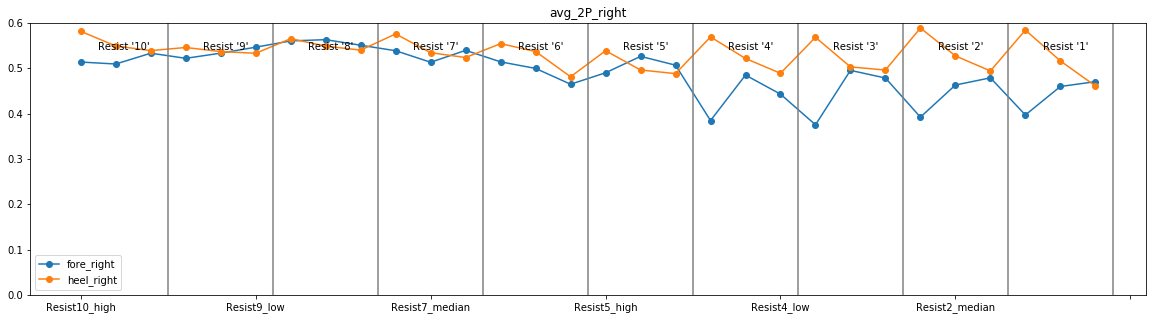

In [52]:
ax1 = avg_2P_info[['fore_left', 'heel_left']].plot(marker='o', figsize=(20,5), title='avg_2P_left')
ax2 = avg_2P_info[['fore_right', 'heel_right']].plot(marker='o', figsize=(20,5), title='avg_2P_right')
for i in range(10):
    ax1.axvline(x=2.5+i*3, color='grey')
    ax1.text(0.5+3*i, 0.54, f"Resist '{10-i}'")
    ax2.axvline(x=2.5+i*3, color='grey')
    ax2.text(0.5+3*i, 0.54, f"Resist '{10-i}'")
    ax1.set_ylim(0,0.6)
    ax2.set_ylim(0,0.6)
    

In [126]:
info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'    
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    data['fore_left'] = data[['volt_0', 'volt_1', 'volt_2']].mean(axis=1)
    data['heel_left'] = data[['volt_4', 'volt_5']].mean(axis=1)
    data['fore_right'] = data[['volt_6', 'volt_7', 'volt_8']].mean(axis=1)
    data['heel_right'] = data[['volt_10', 'volt_11']].mean(axis=1)

    info.append(data[['fore_left', 'heel_left', 'fore_right', 'heel_right']].apply(rmse_minus))
rmse_minus_2P_info = pd.DataFrame(info, index=index_name, columns=['fore_left', 'heel_left', 'fore_right', 'heel_right'])
rmse_minus_2P_info.head(1)

,fore_left,heel_left,fore_right,heel_right
Resist10_high,0.489935,0.512217,0.514006,0.581767


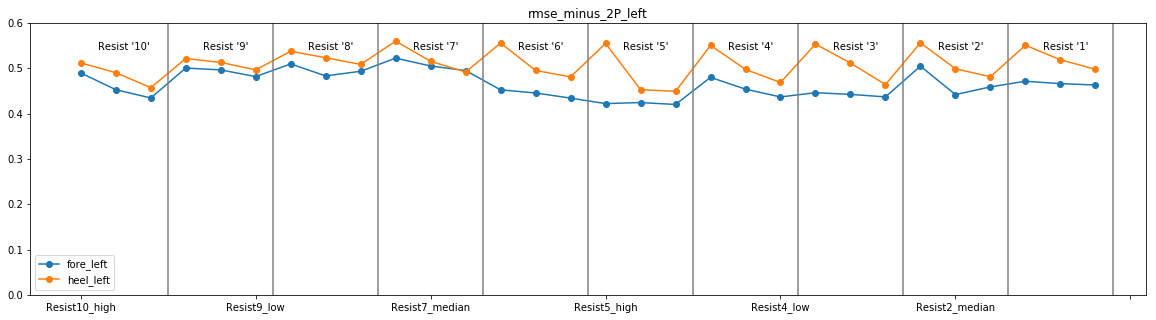

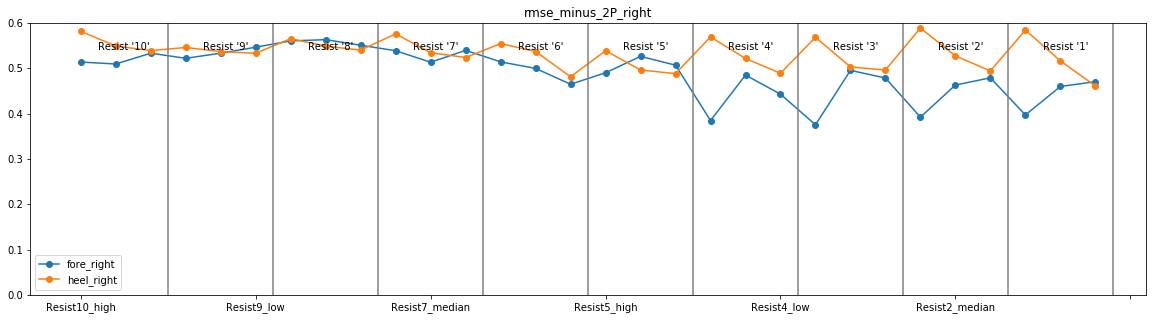

In [40]:
ax1 = rmse_minus_2P_info[['fore_left', 'heel_left']].plot(marker='o', figsize=(20,5), title='rmse_minus_2P_left')
ax2 = rmse_minus_2P_info[['fore_right', 'heel_right']].plot(marker='o', figsize=(20,5), title='rmse_minus_2P_right')
for i in range(10):
    ax1.axvline(x=2.5+i*3, color='grey')
    ax1.text(0.5+3*i, 0.54, f"Resist '{10-i}'")
    ax2.axvline(x=2.5+i*3, color='grey')
    ax2.text(0.5+3*i, 0.54, f"Resist '{10-i}'")
    ax1.set_ylim(0,0.6)
    ax2.set_ylim(0,0.6)

In [123]:
info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'    
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    data['fore_left'] = data[['volt_0', 'volt_1', 'volt_2']].mean(axis=1)
    data['heel_left'] = data[['volt_4', 'volt_5']].mean(axis=1)
    data['fore_right'] = data[['volt_6', 'volt_7', 'volt_8']].mean(axis=1)
    data['heel_right'] = data[['volt_10', 'volt_11']].mean(axis=1)

    info.append(data[['fore_left', 'heel_left', 'fore_right', 'heel_right']].apply(rmse_minus_))
rmse_minus_2_2P_info = pd.DataFrame(info, index=index_name, columns=['fore_left', 'heel_left', 'fore_right', 'heel_right'])
rmse_minus_2_2P_info.head(1)

,fore_left,heel_left,fore_right,heel_right
Resist10_high,0.104175,0.093666,0.084324,0.061416


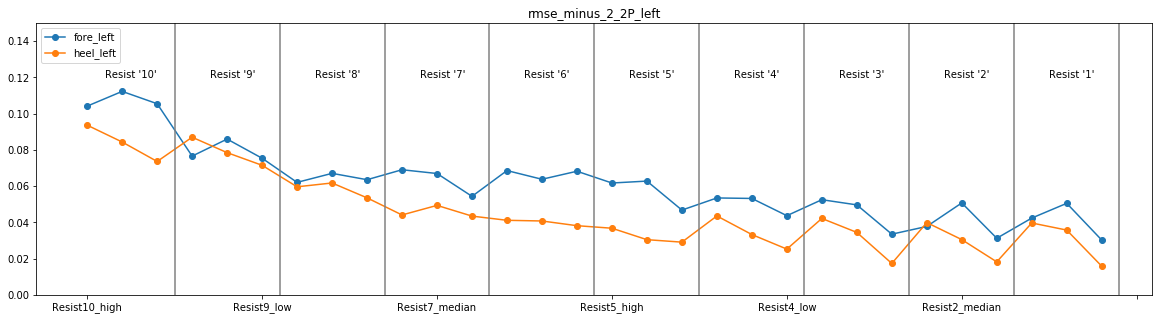

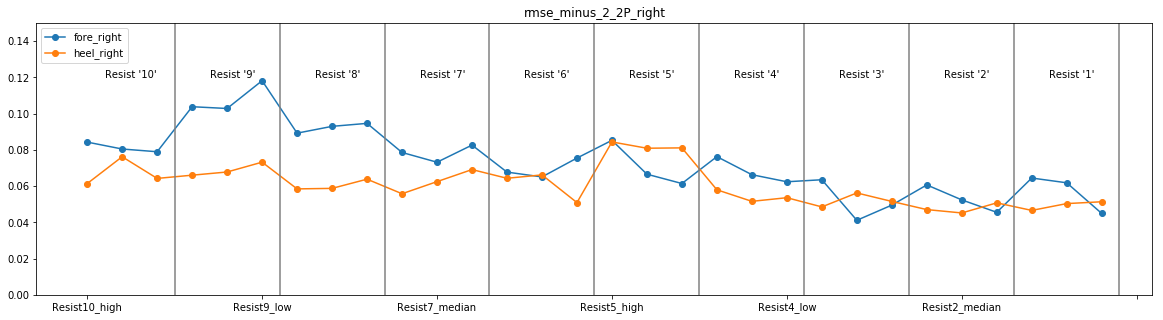

In [120]:
ax1 = rmse_minus_2_2P_info[['fore_left', 'heel_left']].plot(marker='o', figsize=(20,5), title='rmse_minus_2_2P_left')
ax2 = rmse_minus_2_2P_info[['fore_right', 'heel_right']].plot(marker='o', figsize=(20,5), title='rmse_minus_2_2P_right')
for i in range(10):
    ax1.axvline(x=2.5+i*3, color='grey')
    ax1.text(0.5+3*i, 0.12, f"Resist '{10-i}'")
    ax2.axvline(x=2.5+i*3, color='grey')
    ax2.text(0.5+3*i, 0.12, f"Resist '{10-i}'")
    ax1.set_ylim(0,0.15)
    ax2.set_ylim(0,0.15)

In [127]:
info = []
for i in range(1,31):
    file = f'jy_20200527_{i}.csv'    
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    freq_series = data.apply(cal_rpm)
    freq = freq_series.sort_values()[6]
    info.append(freq)
rpm = info

In [128]:
rmse_minus_2P_info.insert(0, 'rpm (cycle/s)', rpm)

In [130]:
rmse_minus_2P_info.to_csv('rmse_minus_2P.csv')

In [137]:
# fix resist05
info = []
for i in range(1,31):
    file = f'fix_resist05/jy_20200527_{i}.csv'    
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    data['fore_left'] = data[['volt_0', 'volt_1', 'volt_2']].mean(axis=1)
    data['heel_left'] = data[['volt_4', 'volt_5']].mean(axis=1)
    data['fore_right'] = data[['volt_6', 'volt_7', 'volt_8']].mean(axis=1)
    data['heel_right'] = data[['volt_10', 'volt_11']].mean(axis=1)

    info.append(data[['fore_left', 'heel_left', 'fore_right', 'heel_right']].apply(rmse_minus))
rmse_minus_2P_info = pd.DataFrame(info, index=index_name, columns=['fore_left', 'heel_left', 'fore_right', 'heel_right'])
rmse_minus_2P_info.head(1)

,fore_left,heel_left,fore_right,heel_right
Resist10_high,0.489935,0.512217,0.514006,0.581767


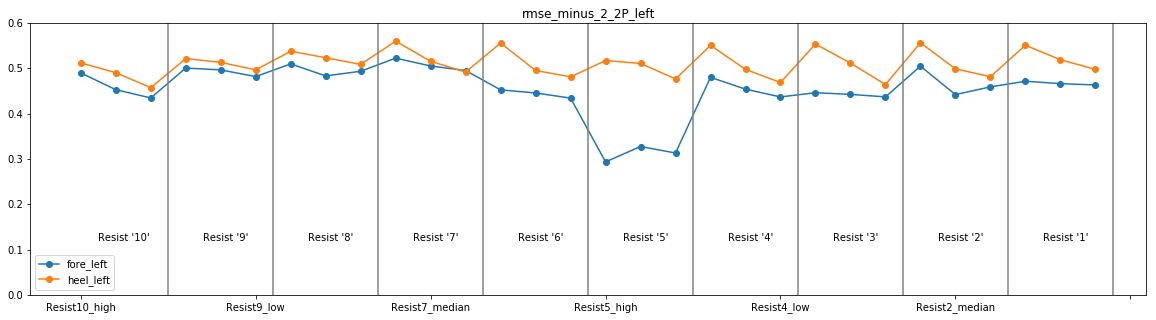

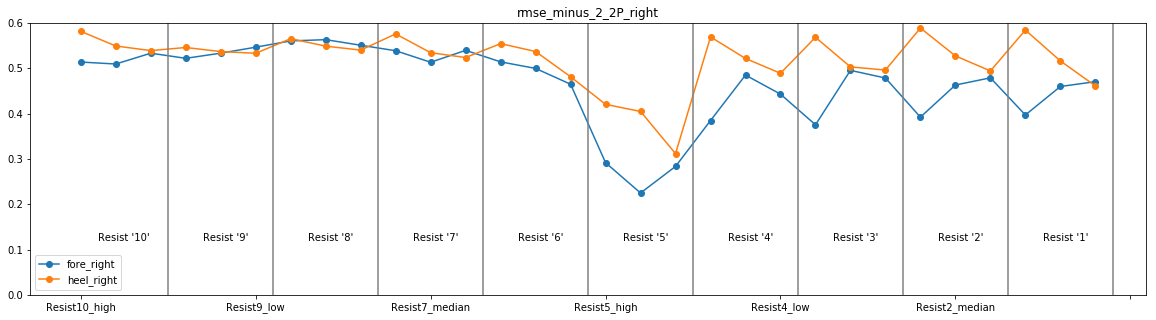

In [138]:
ax1 = rmse_minus_2P_info[['fore_left', 'heel_left']].plot(marker='o', figsize=(20,5), title='rmse_minus_2_2P_left')
ax2 = rmse_minus_2P_info[['fore_right', 'heel_right']].plot(marker='o', figsize=(20,5), title='rmse_minus_2_2P_right')
for i in range(10):
    ax1.axvline(x=2.5+i*3, color='grey')
    ax1.text(0.5+3*i, 0.12, f"Resist '{10-i}'")
    ax2.axvline(x=2.5+i*3, color='grey')
    ax2.text(0.5+3*i, 0.12, f"Resist '{10-i}'")
    ax1.set_ylim(0,0.6)
    ax2.set_ylim(0,0.6)

In [142]:
info = []
for i in range(1,31):
    file = f'fix_resist05/jy_20200527_{i}.csv'    
    data = pd.read_csv(file, index_col='interval(s)', usecols=col_list)
    freq_series = data.apply(cal_rpm)
    freq = freq_series.sort_values()[6]
    info.append(freq)
rpm = info
rmse_minus_2P_info.insert(0, 'rpm (cycle/s)', rpm)
rmse_minus_2P_info.to_csv('rmse_minus_2P.csv')